In [2]:
#url for dataset: https://www.kaggle.com/chirag9073/zomato-restaurants-analysis-and-prediction/data

In [3]:
#imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as  plt

In [4]:
#reading file

zomato_real = pd.read_csv('C:/Users/AKASH/Desktop/Stats ML/zomato/zomato.csv')

In [5]:
zomato_real.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
len(zomato_real.reviews_list[0])
#which means the first resturant has total of 3955 reviews

3955

In [7]:
type(zomato_real)

pandas.core.frame.DataFrame

In [8]:
zomato_real.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [9]:
zomato_real['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [10]:
zomato_real.isnull()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
51713,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
51714,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False
51715,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
zomato_missing_sum = zomato_real.isnull().sum()
zomato_missing_sum

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [12]:
#percentage of missing values
(zomato_missing_sum/zomato_real.shape[0])*100

#more than 50% data is missing from dish_liked column so we should drop that column

url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [13]:
zomato_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [14]:
zomato_real.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [15]:
#“axis 0” represents rows
#"axis 1” represents columns

zomato = zomato_real.drop(['url', 'dish_liked', 'phone'], axis=1)

In [16]:
zomato.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [17]:
type(zomato)

pandas.core.frame.DataFrame

In [18]:
zomato.duplicated().sum()

43

In [19]:
zomato.drop_duplicates(inplace=True)

In [20]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51674 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      51674 non-null  object
 1   name                         51674 non-null  object
 2   online_order                 51674 non-null  object
 3   book_table                   51674 non-null  object
 4   rate                         43907 non-null  object
 5   votes                        51674 non-null  int64 
 6   location                     51653 non-null  object
 7   rest_type                    51447 non-null  object
 8   cuisines                     51629 non-null  object
 9   approx_cost(for two people)  51329 non-null  object
 10  reviews_list                 51674 non-null  object
 11  menu_item                    51674 non-null  object
 12  listed_in(type)              51674 non-null  object
 13  listed_in(city)              51

In [21]:
(zomato.isnull().sum()/zomato_real.shape[0])*100

address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.018273
votes                           0.000000
location                        0.040606
rest_type                       0.438927
cuisines                        0.087012
approx_cost(for two people)     0.667092
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [22]:
zomato.dropna(how='any', inplace=True)

In [23]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      43499 non-null  object
 1   name                         43499 non-null  object
 2   online_order                 43499 non-null  object
 3   book_table                   43499 non-null  object
 4   rate                         43499 non-null  object
 5   votes                        43499 non-null  int64 
 6   location                     43499 non-null  object
 7   rest_type                    43499 non-null  object
 8   cuisines                     43499 non-null  object
 9   approx_cost(for two people)  43499 non-null  object
 10  reviews_list                 43499 non-null  object
 11  menu_item                    43499 non-null  object
 12  listed_in(type)              43499 non-null  object
 13  listed_in(city)              43

In [24]:
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [25]:
zomato = zomato.rename(columns = {'approx_cost(for two people)': 'cost',
               'listed_in(type)': 'type',
               'listed_in(city)': 'city'})

In [26]:
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

## some transformations

In [27]:
zomato.dtypes


#we can see cost is object type, so we'll convert it to float type

address         object
name            object
online_order    object
book_table      object
rate            object
votes            int64
location        object
rest_type       object
cuisines        object
cost            object
reviews_list    object
menu_item       object
type            object
city            object
dtype: object

In [28]:
type(zomato)

pandas.core.frame.DataFrame

In [29]:
zomato.cost.unique()
#we can see cost is in quotes hence object types is shown
#we'll remove ',' from cost 

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [30]:
#Using lambda function to replace ',' from cost

zomato['cost'] = zomato['cost'].apply(lambda x: x.replace(',', ''))

In [31]:
zomato.cost.unique()

#no comma is present anymore

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '1700', '1400', '1350', '2200', '2000', '1800',
       '1900', '180', '330', '2500', '2100', '3000', '2800', '3400', '50',
       '40', '1250', '3500', '4000', '2400', '2600', '1450', '70', '3200',
       '560', '240', '360', '6000', '1050', '2300', '4100', '120', '5000',
       '3700', '1650', '2700', '4500'], dtype=object)

In [32]:
#converting cost to float type using astype

zomato['cost'] = zomato['cost'].astype(float)

In [33]:
zomato.info()

#we can see that the cost has been converted from 'object' to 'Float'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       43499 non-null  object 
 1   name          43499 non-null  object 
 2   online_order  43499 non-null  object 
 3   book_table    43499 non-null  object 
 4   rate          43499 non-null  object 
 5   votes         43499 non-null  int64  
 6   location      43499 non-null  object 
 7   rest_type     43499 non-null  object 
 8   cuisines      43499 non-null  object 
 9   cost          43499 non-null  float64
 10  reviews_list  43499 non-null  object 
 11  menu_item     43499 non-null  object 
 12  type          43499 non-null  object 
 13  city          43499 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.0+ MB


In [34]:
zomato.cost.unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130., 1700., 1400., 1350., 2200., 2000., 1800., 1900.,
        180.,  330., 2500., 2100., 3000., 2800., 3400.,   50.,   40.,
       1250., 3500., 4000., 2400., 2600., 1450.,   70., 3200.,  560.,
        240.,  360., 6000., 1050., 2300., 4100.,  120., 5000., 3700.,
       1650., 2700., 4500.])

In [35]:
#working with rating obtained by resturants
zomato['rate']

0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51709    3.7 /5
51711    2.5 /5
51712    3.6 /5
51715    4.3 /5
51716    3.4 /5
Name: rate, Length: 43499, dtype: object

In [36]:
zomato.shape

(43499, 14)

In [37]:
zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [38]:
zomato.shape

(43499, 14)

In [39]:
zomato = zomato.loc[zomato['rate'] != 'NEW']


In [40]:
zomato.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5', '4.5/5',
       '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '3.4 /5',
       '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5',
       '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5', '3.5 /5',
       '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5', '4.3 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5', '4.9 /5',
       '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [41]:
zomato.shape

(41302, 14)

In [48]:
zomato = zomato.loc[zomato['rate']!='-'].reset_index(drop=True)

In [49]:
remove_slash = lambda x: x.replace('/5', '') if type(x)==np.str else x

In [50]:
zomato.rate = zomato.rate.apply(remove_slash).str.strip().astype('float')

C:\Users\AKASH\AppData\Local\Temp/ipykernel_14952/3624118742.py:1: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  remove_slash = lambda x: x.replace('/5', '') if type(x)==np.str else x


In [60]:
zomato.rate.unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [61]:
#adjust column names
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [64]:
zomato.name = zomato.name.apply(lambda x: x.title())
zomato.online_order.replace(('Yes', 'No'), (True, False), inplace=True)
zomato.book_table.replace(('Yes', 'No'), (True, False), inplace=True)

## Encoding

In [67]:
## it is not needed but just for practice

# Label encoding
# one hot encoding

In [68]:
def Encode(zomato):
    for column in zomato.columns[~zomato.columns.isin(['rate', 'cost', 'votes'])]:
        zomato[column] = zomato[column].factorize()[0]
    
    return zomato

In [69]:
zomato_en = Encode(zomato.copy())
zomato_en.head()

# as we can see all the categorical values have been encoded to integer

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,0,0,0,0,4.1,775,0,0,0,800.0,0,0,0,0
1,1,1,0,1,4.1,787,0,0,1,800.0,1,0,0,0
2,2,2,0,1,3.8,918,0,1,2,800.0,2,0,0,0
3,3,3,1,1,3.7,88,0,2,3,300.0,3,0,0,0
4,4,4,1,1,3.8,166,1,0,4,600.0,4,0,0,0


In [74]:
zomato.columns[~zomato.columns.isin(['rate', 'cost', 'votes'])]

Index(['address', 'name', 'online_order', 'book_table', 'location',
       'rest_type', 'cuisines', 'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

 ## correlation

In [92]:
zomato_en.corr()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
address,1.000000,0.682346,0.165707,0.021447,-0.036195,-0.010738,0.614626,0.030634,0.238421,-0.013922,0.512074,0.058929,0.094137,0.423011
name,0.682346,1.000000,0.231616,-0.033718,-0.046936,-0.043871,0.448705,0.036212,0.301793,0.057884,0.339130,-0.031798,0.116000,0.307128
online_order,0.165707,0.231616,1.000000,-0.054894,-0.069042,0.013278,0.048645,0.136741,0.049921,0.175627,0.051440,-0.362114,0.239236,0.054354
book_table,0.021447,-0.033718,-0.054894,1.000000,-0.426027,-0.393270,-0.032781,-0.226763,-0.225396,-0.614221,-0.132809,0.040496,-0.114302,-0.028847
rate,-0.036195,-0.046936,-0.069042,-0.426027,1.000000,0.435237,0.030363,0.196933,0.189624,0.385261,0.159661,0.054942,0.034038,0.023908
votes,-0.010738,-0.043871,0.013278,-0.393270,0.435237,1.000000,0.006847,0.221805,0.158714,0.366544,0.140364,-0.000754,0.070373,0.026348
location,0.614626,0.448705,0.048645,-0.032781,0.030363,0.006847,1.000000,0.046133,0.178518,0.067234,0.407854,0.089058,0.040451,0.361957
rest_type,0.030634,0.036212,0.136741,-0.226763,0.196933,0.221805,0.046133,1.000000,0.158553,0.315216,0.085501,-0.023399,0.147835,0.047756
cuisines,0.238421,0.301793,0.049921,-0.225396,0.189624,0.158714,0.178518,0.158553,1.000000,0.270041,0.196259,0.026915,0.083311,0.141997
cost,-0.013922,0.057884,0.175627,-0.614221,0.385261,0.366544,0.067234,0.315216,0.270041,1.000000,0.147086,-0.074417,0.185544,0.056594


<AxesSubplot:>

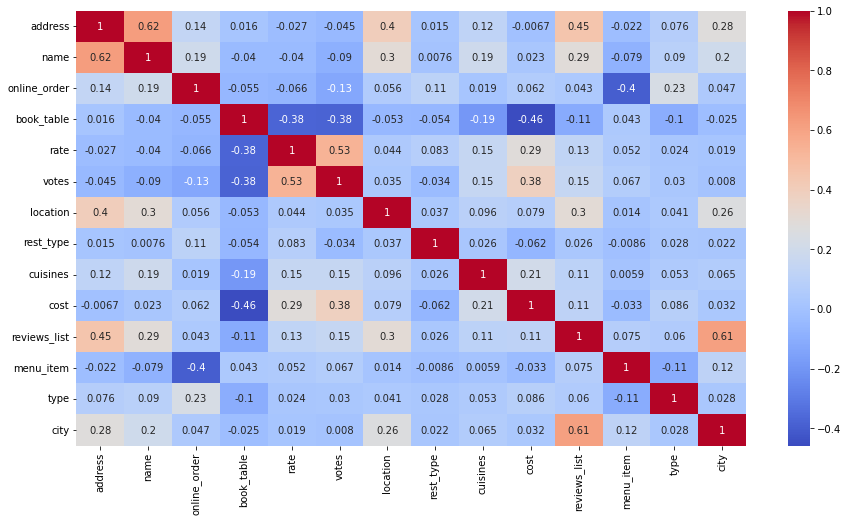

In [94]:
corr = zomato_en.corr(method = 'kendall')
plt.figure(figsize = (15,8))
sns.heatmap(corr, annot=True, cmap = 'coolwarm')


C:\Users\AKASH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='online_order', ylabel='count'>

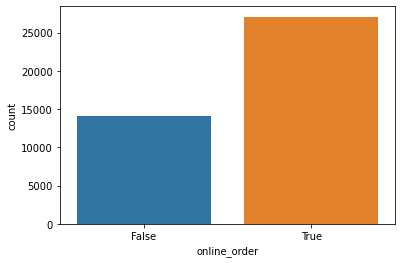

In [104]:
#how many restaurants are taking online orders
sns.countplot(zomato['online_order'])


C:\Users\AKASH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='online_order', ylabel='count'>

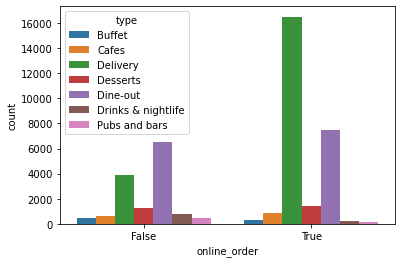

In [99]:
sns.countplot(zomato['online_order'], hue = zomato['type'] )

In [107]:
# tabular data of rating obtained diff hotel and in diff locations

loc_plt = pd.crosstab(zomato['rate'], zomato['city'])
loc_plt.head()

city,BTM,Banashankari,Bannerghatta Road,Basavanagudi,Bellandur,Brigade Road,Brookefield,Church Street,Electronic City,Frazer Town,...,Lavelle Road,MG Road,Malleshwaram,Marathahalli,New BEL Road,Old Airport Road,Rajajinagar,Residency Road,Sarjapur Road,Whitefield
rate,,,,,,,,,,,,,,,,,,,,,
1.8,0,0,0,0,0,1,0,1,0,0,...,1,1,0,0,0,0,0,1,0,0
2.0,0,0,0,0,0,2,0,2,0,0,...,1,2,0,2,0,0,0,2,0,0
2.1,0,0,0,0,2,1,4,1,0,1,...,1,1,0,6,0,0,0,0,3,0
2.2,2,0,2,0,1,3,3,3,0,1,...,2,3,0,0,0,0,0,2,0,0
2.3,4,0,3,0,4,1,2,1,0,0,...,2,1,2,2,0,0,2,3,4,0


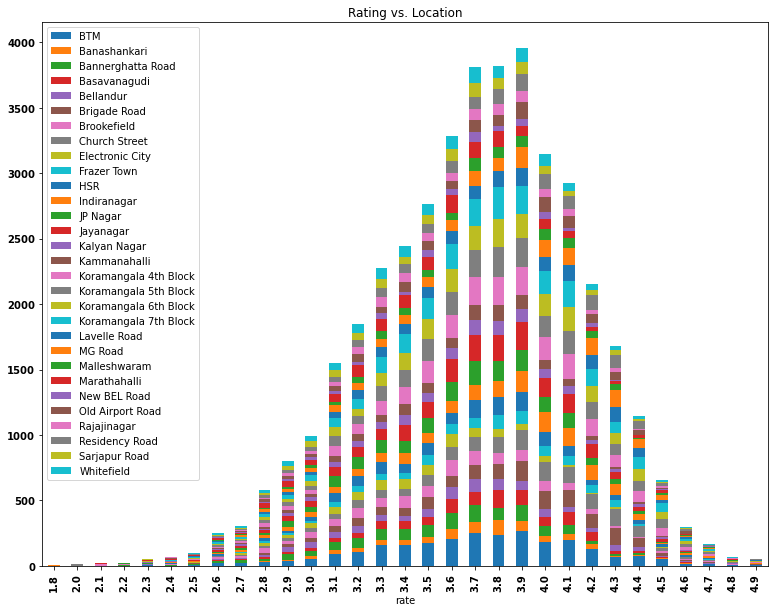

In [140]:
## Location and Rating
# graph of rating obtained diff hotel and in diff locations
# plt.gcf()
# plt.figure(figsize = (15,15))

loc_plt = pd.crosstab(zomato['rate'], zomato['city'])
loc_plt.plot(kind = 'bar', stacked = True)
fig = plt.gcf()
fig.set_size_inches(13,10)

plt.title('Rating vs. Location')

plt.xticks(fontsize = 10, fontweight = 'bold')
plt.yticks(fontsize = 10, fontweight = 'bold')

plt.legend()


C:\Users\AKASH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='book_table', ylabel='count'>

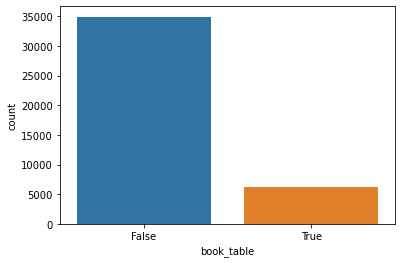

In [120]:
# whether had takeaway was more in demand or booking

sns.countplot(zomato['book_table'])

#so we can clearly see that table booking was way too less compared to takeaway


C:\Users\AKASH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


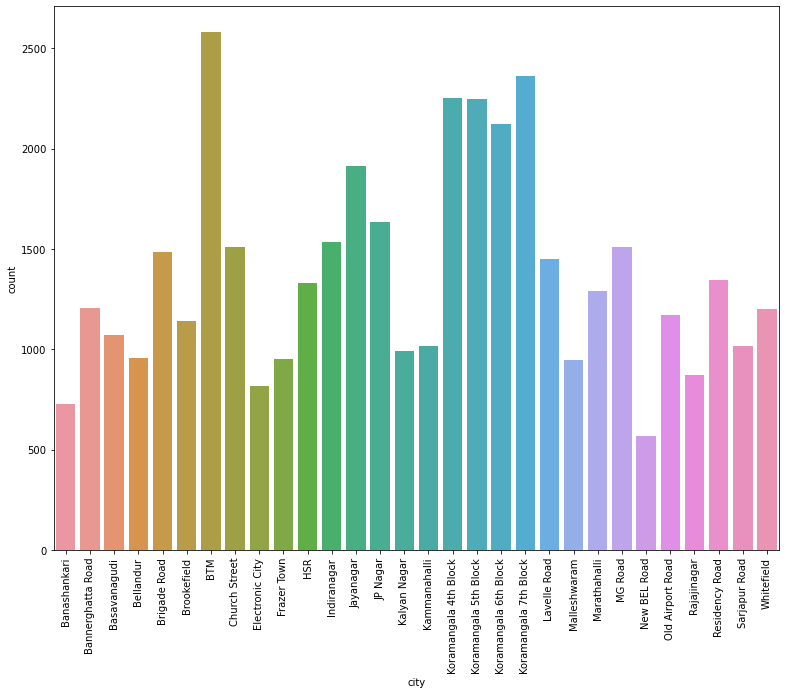

In [134]:
# which location was having the maximum number of restuarants
#we use set_xticklabels to rotate the labels of x axis by 90 degree for better visual
# and we have to manually feed the column name to set_xticklabels
loc = zomato.city.unique()
sns.countplot(zomato['city']).set_xticklabels(loc,rotation = 90)
fig = plt.gcf()
fig.set_size_inches(13,10)



C:\Users\AKASH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


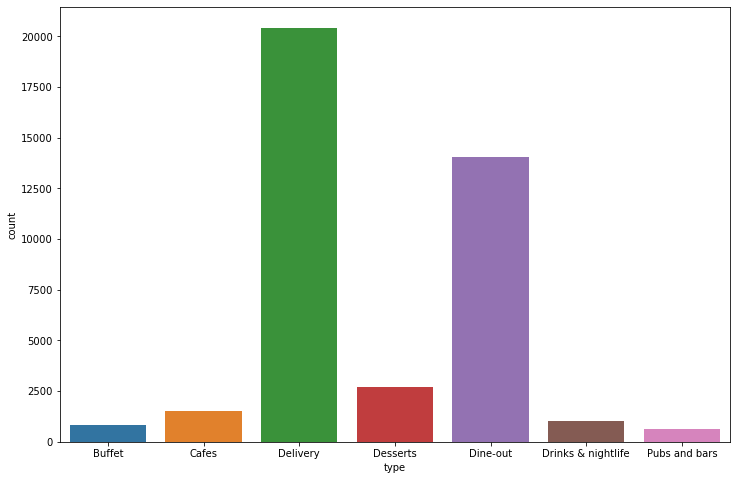

In [146]:
# which ordering ""type"" is more preferred in bangalore (i.e., has more count)

sns.countplot(zomato['type']) #.set_xticklabels(loc,rotation = 90)
fig = plt.gcf()
fig.set_size_inches(12,8)

#so we can clearly see that delivery type is more preferred or has maximum no of count
# and pubs & bars have least count


C:\Users\AKASH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


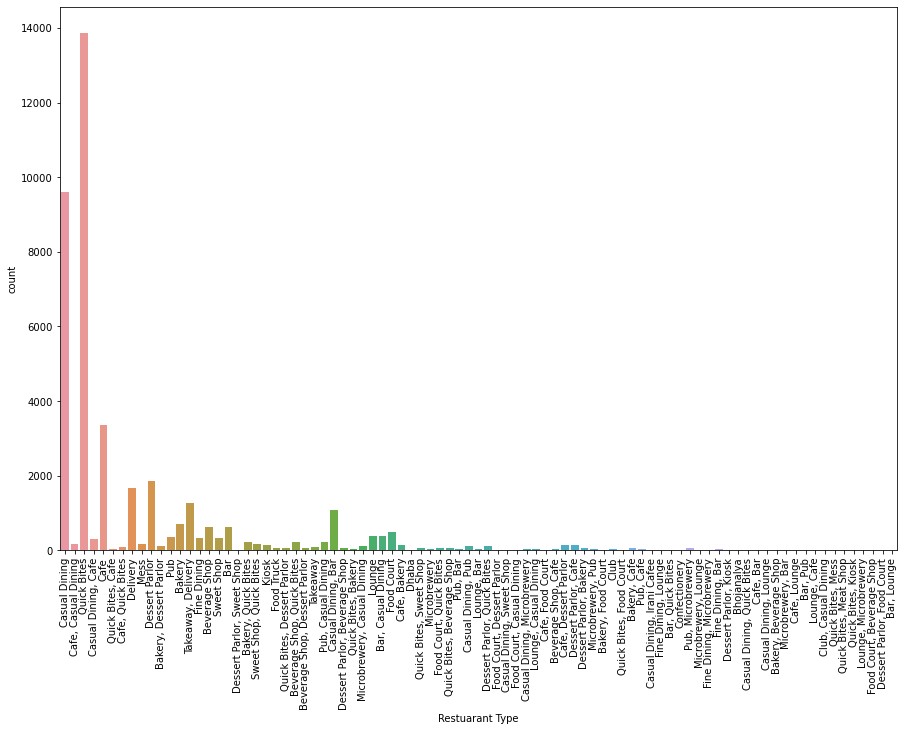

In [163]:
# which restuarant type is more famous in bangalore (i.e., has more count)
res_t = zomato.rest_type.unique()
ax = sns.countplot(zomato['rest_type']) .set_xticklabels(res_t,rotation = 90)
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.xlabel('Restuarant Type')
#ax.set(xlabel=' xlabel', ylabel=' ylabel')
plt.show()

# we can clearly see quick bites followed by casual dining are the most famous type 

type                     Buffet  Cafes  Delivery  Desserts  Dine-out  \
rest_type                                                              
Bakery                        0      0       344       348         9   
Bakery, Beverage Shop         0      0         0         1         0   
Bakery, Cafe                  0     20        21        19        12   
Bakery, Dessert Parlor        0      0        64        59         4   
Bakery, Food Court            0      0         0         2         0   
...                         ...    ...       ...       ...       ...   
Quick Bites, Sweet Shop       0      0        25        27        23   
Sweet Shop                    0      0       164       158        24   
Sweet Shop, Quick Bites       0      0        63        74        33   
Takeaway                      0      0        65        14         0   
Takeaway, Delivery            0      0      1188        75        15   

type                     Drinks & nightlife  Pubs and bars  
re

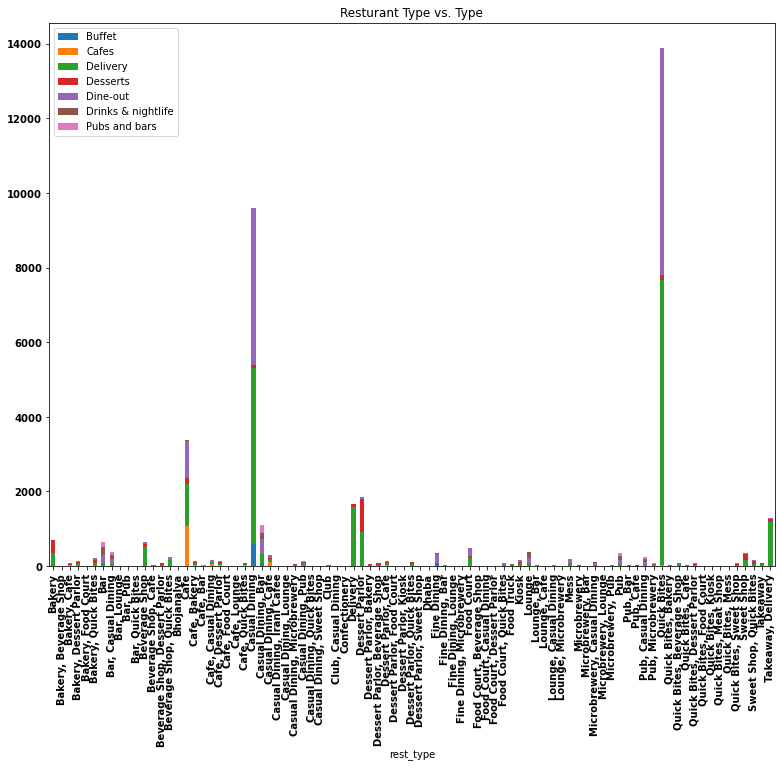

In [166]:
######
###
# so combining the above two graph info we can say that maximum
# res_t = zomato.rest_type.unique()
# ax = sns.countplot(zomato['rest_type'], hue = zomato['type']) .set_xticklabels(res_t,rotation = 90)
# fig = plt.gcf()
# fig.set_size_inches(15,10)
# plt.xlabel('Restuarant Type')
# #ax.set(xlabel=' xlabel', ylabel=' ylabel')
# plt.show()

# we can get the most used dining style like "casual dining or quick bites" and 
# by what mode like 'delivery or takeaway' do people preer to get food from those places

type_res = pd.crosstab(zomato['rest_type'], zomato['type'])
print(type_res, '\n*******************************************\n*******************************************\n')
type_res.plot(kind = 'bar', stacked = True)
fig = plt.gcf()
fig.set_size_inches(13,10)

plt.title('Resturant Type vs. Type')

plt.xticks(fontsize = 10, fontweight = 'bold')
plt.yticks(fontsize = 10, fontweight = 'bold')

plt.legend()


##
## we can interpret that quickbite and casual dining are the most preferable resturants type
## and we can see the maximum deliveries happen at those place
## so we can place the resources accordingly

In [252]:
# what's the most famous restuarant chains in bangalore
# display top 20 most famous restuarant chains in bangalore

In [262]:
## Approach 1##
##based on count of restaurants in dataset

zomato['name'].value_counts()[:20]


Cafe Coffee Day        86
Onesta                 85
Empire Restaurant      69
Kanti Sweets           68
Just Bake              68
Five Star Chicken      68
Baskin Robbins         62
Kfc                    60
Petoo                  60
Pizza Hut              60
Domino'S Pizza         59
Subway                 59
Smoor                  59
Mcdonald'S             59
Sweet Truth            58
Polar Bear             58
Beijing Bites          56
Faasos                 56
Burger King            55
Smally'S Resto Cafe    54
Name: name, dtype: int64

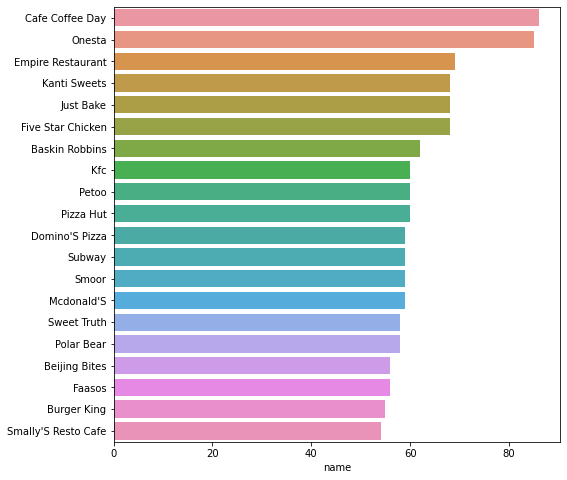

In [267]:
sns.barplot(x= zomato.name.value_counts()[:20], y = zomato.name.value_counts()[:20].index )
fig = plt.gcf()
fig.set_size_inches(8,8)
